In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/tweets.csv')

In [ ]:
df.head()

,token,date,reply_count,like_count,retweet_count,quote_count,text,sentiment_label,sentiment_score
0,bitcoin,2022-01-01 00:00:00.000,20,207,31,3,Most people underestimate the impact #Bitcoin ...,Neutral,0.717482
1,bitcoin,2022-01-01 00:00:00.000,232,3405,286,27,#Bitcoin has started a new yearly candle https...,Neutral,0.810814
2,bitcoin,2022-01-01 00:00:00.000,2,861,12,0,@DESTROYBINARY did people forget that the amog...,Neutral,0.606978
3,bitcoin,2022-01-01 00:00:00.000,18,306,30,9,"In 2017, miners attempted to assert control ov...",Negative,0.510956
4,bitcoin,2022-01-01 00:00:00.000,35,721,35,1,Yearly Close \nMonthly Close\nDaily Close\n\nh...,Positive,0.988296


In [ ]:
!pip install contractions
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Accuracy of VADER predictions: 57.54%


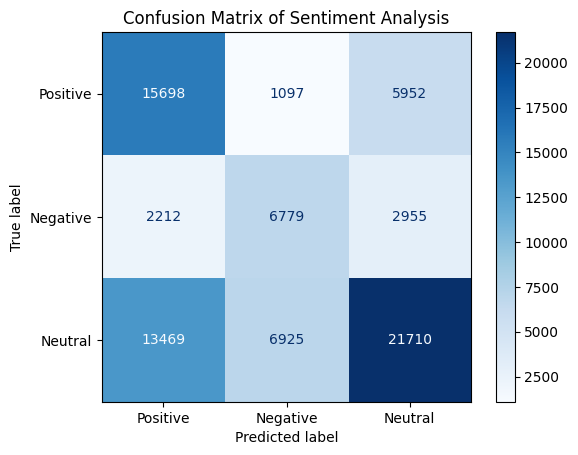

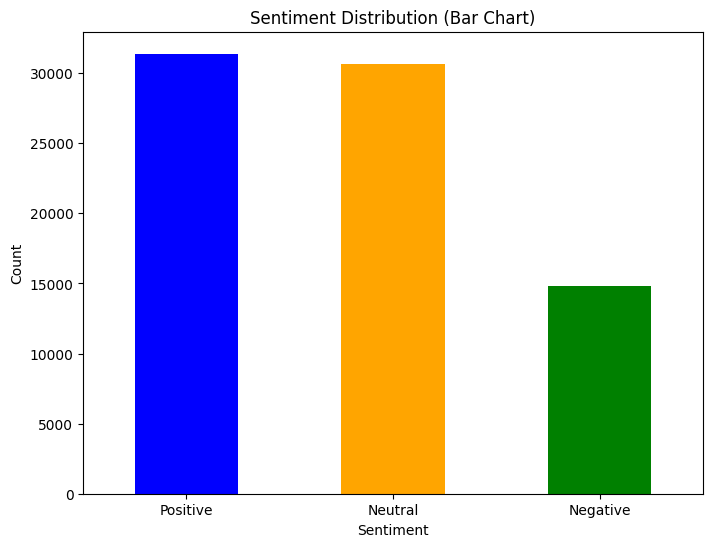

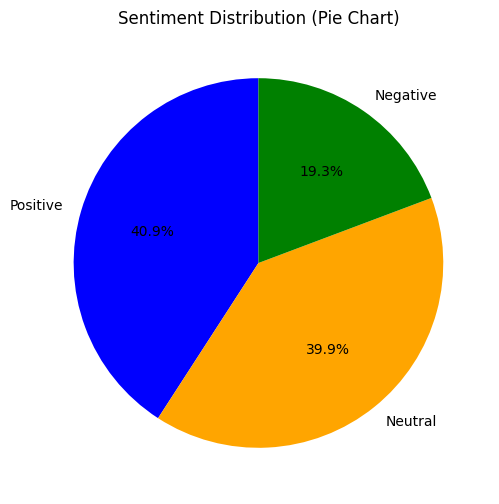


Most Positive Tweet:
text              UPDATE: #Bitcoin time frames 👇\n\nMonthly is b...
compound_score                                               0.9958
Name: 68048, dtype: object

Most Negative Tweet:
text              #Ethereum is a premined scam\n#BNB is a centra...
compound_score                                              -0.9875
Name: 35650, dtype: object


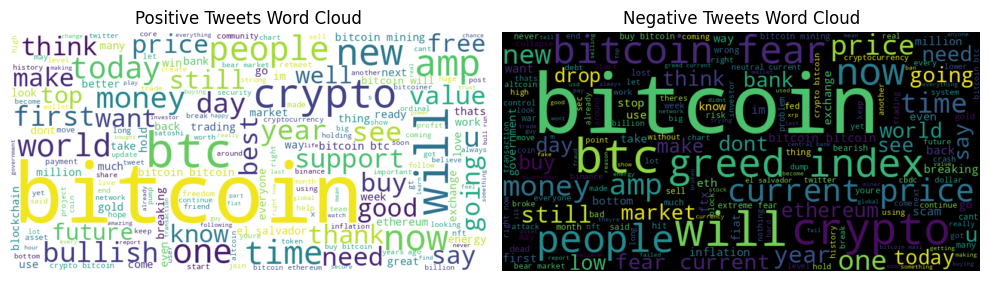

In [ ]:
import pandas as pd
import numpy as np
import re
import emoji
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Enhanced text cleaning function
def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"[^a-zA-Z#\s]", "", text)  # Remove special characters but keep hashtags
    text = emoji.demojize(text)  # Convert emojis to descriptive text
    text = re.sub(r"_", " ", text)  # Replace underscores in demojized text
    return text.lower().strip()

df['cleaned_text'] = df['text'].apply(clean_tweet)

# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Add custom domain-specific words to VADER
custom_lexicon = {
    'bullish': 3.0,
    'bearish': -3.0,
    'HODL': 2.0,
    'moon': 2.5,
    'dump': -2.5,
    'pump': 2.0,
    'rekt': -3.0,
}
sia.lexicon.update(custom_lexicon)

# Define a custom VADER sentiment function
def vader_sentiment_analysis(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    # Adjust thresholds for sentiment labeling
    if compound >= 0.2:  # Higher threshold for positive sentiment
        return 'Positive'
    elif compound <= -0.2:  # Lower threshold for negative sentiment
        return 'Negative'
    else:
        return 'Neutral'

# Apply VADER sentiment analysis
df['vader_sentiment'] = df['cleaned_text'].apply(vader_sentiment_analysis)

# Evaluate accuracy
accuracy = accuracy_score(df['sentiment_label'], df['vader_sentiment'])
print(f"Accuracy of VADER predictions: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(df['sentiment_label'], df['vader_sentiment'], labels=['Positive', 'Negative', 'Neutral'])
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Positive', 'Negative', 'Neutral'])
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Sentiment Analysis")
plt.show()

# Plot sentiment distribution (Bar chart)
sentiment_counts = df['vader_sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Sentiment Distribution (Bar Chart)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot sentiment distribution (Pie chart)
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange', 'green'], startangle=90, legend=False)
plt.title('Sentiment Distribution (Pie Chart)')
plt.ylabel('')
plt.show()

# Highlight most positive and most negative tweets
df['compound_score'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
most_positive = df.loc[df['compound_score'].idxmax()]
most_negative = df.loc[df['compound_score'].idxmin()]

print("\nMost Positive Tweet:")
print(most_positive[['text', 'compound_score']])

print("\nMost Negative Tweet:")
print(most_negative[['text', 'compound_score']])

# Word clouds for positive and negative tweets
positive_words = ' '.join(df[df['vader_sentiment'] == 'Positive']['cleaned_text'])
negative_words = ' '.join(df[df['vader_sentiment'] == 'Negative']['cleaned_text'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_words)

# Display word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Tweets Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# prompt: compare the accuracy of predicted and original dataset

from sklearn.metrics import accuracy_score, classification_report

# Assuming 'sentiment_label' contains the actual sentiment labels
# and 'vader_sentiment' contains the predicted sentiment
if 'sentiment_label' in df.columns and 'vader_sentiment' in df.columns:
    accuracy = accuracy_score(df['sentiment_label'], df['vader_sentiment'])  # Changed to 'vader_sentiment'
    print(f"Accuracy: {accuracy}")

    # Classification report for more detailed metrics
    print(classification_report(df['sentiment_label'], df['vader_sentiment'], labels=['Positive', 'Negative', 'Neutral'])) # Changed to 'vader_sentiment'
else:
    print("No 'sentiment_label' or 'vader_sentiment' column found. Cannot calculate accuracy.")

Accuracy: 0.5753740380483613
              precision    recall  f1-score   support

    Positive       0.50      0.69      0.58     22747
    Negative       0.46      0.57      0.51     11946
     Neutral       0.71      0.52      0.60     42104

    accuracy                           0.58     76797
   macro avg       0.56      0.59      0.56     76797
weighted avg       0.61      0.58      0.58     76797



In [ ]:

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import confusion_matrix
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


# Install contractions library if not already installed
!pip install contractions

import contractions

# Load your dataset
df = pd.read_csv('/content/tweets.csv')

def clean_tweet(tweet):
    tweet = contractions.fix(tweet)  # Expand contractions
    tweet = re.sub(r"@[A-Za-z0-9]+", "", tweet)  # Remove mentions
    tweet = re.sub(r"#", "", tweet)  # Remove '#' symbol
    tweet = re.sub(r"RT[\s]+", "", tweet)  # Remove RT
    tweet = re.sub(r"https?:\/\/\S+", "", tweet)  # Remove hyperlinks
    tweet = re.sub(r"\s+", " ", tweet).strip()  # Remove excessive whitespace
    tweet = re.sub(r"[^a-zA-Z\s]", "", tweet) # Remove special characters
    tweet = tweet.lower()  # Convert to lowercase
    return tweet

df['clean_tweet'] = df['text'].apply(clean_tweet)

# Split data into training and testing sets
X = df['clean_tweet']
y = df['sentiment_label']  # Assuming you have a 'sentiment_label' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000) # Adjust max_features if needed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000) # Increased max_iter
model.fit(X_train_vec, y_train)

# Prediction and Evaluation
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7209635416666667
              precision    recall  f1-score   support

    Negative       0.67      0.44      0.53      2397
     Neutral       0.72      0.86      0.78      8417
    Positive       0.75      0.62      0.68      4546

    accuracy                           0.72     15360
   macro avg       0.71      0.64      0.66     15360
weighted avg       0.72      0.72      0.71     15360



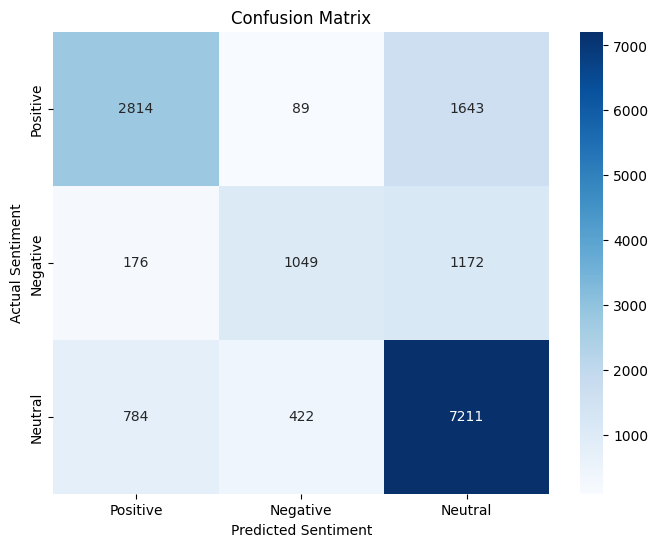

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined from your model's prediction
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Negative', 'Neutral'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Positive', 'Negative', 'Neutral'],
            yticklabels=['Positive', 'Negative', 'Neutral'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


Accuracy: 0.8199869791666666
              precision    recall  f1-score   support

    Negative       0.79      0.65      0.71      2932
     Neutral       0.80      0.86      0.83      6347
    Positive       0.86      0.86      0.86      6081

    accuracy                           0.82     15360
   macro avg       0.82      0.79      0.80     15360
weighted avg       0.82      0.82      0.82     15360



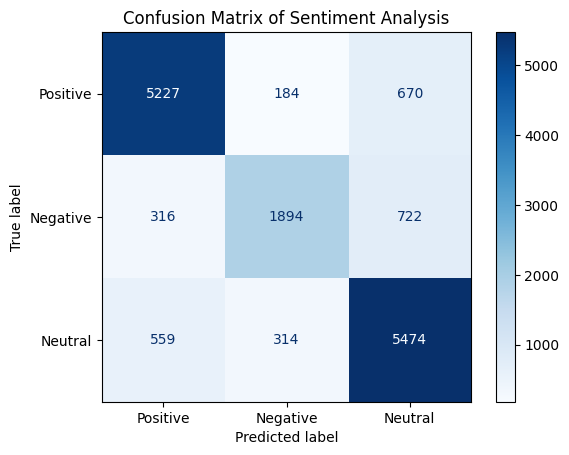

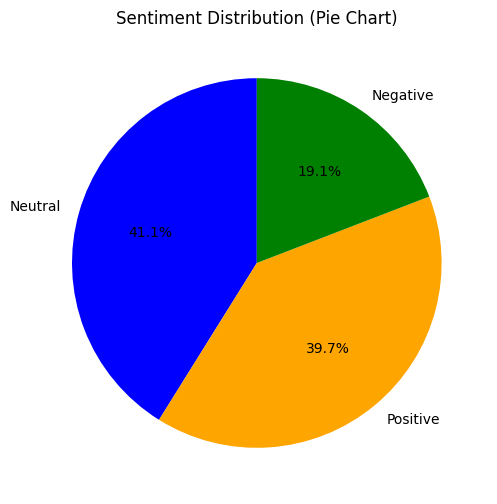

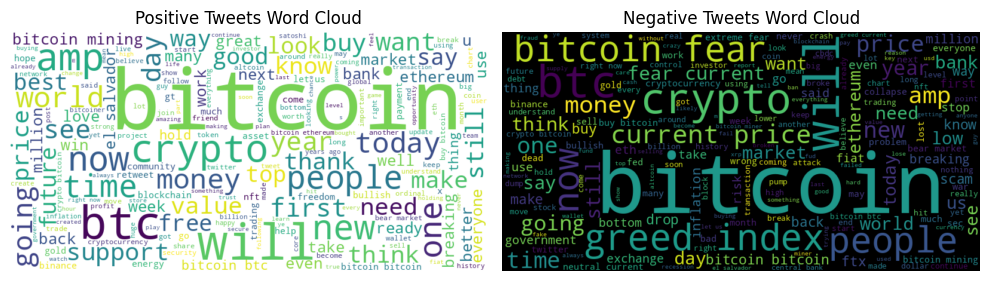

In [ ]:
import numpy as np
import pandas as pd
import re
import contractions
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import confusion_matrix
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Enhanced tweet cleaning function
def clean_tweet(tweet):
    tweet = contractions.fix(tweet)  # Expand contractions
    tweet = re.sub(r"@[A-Za-z0-9]+", "", tweet)  # Remove mentions
    tweet = re.sub(r"#", "", tweet)  # Remove '#' symbol
    tweet = re.sub(r"RT[\s]+", "", tweet)  # Remove RT
    tweet = re.sub(r"https?:\/\/\S+", "", tweet)  # Remove hyperlinks
    tweet = re.sub(r"\s+", " ", tweet).strip()  # Remove excessive whitespace
    tweet = re.sub(r"[^a-zA-Z\s]", "", tweet)  # Remove special characters
    tweet = tweet.lower()  # Convert to lowercase
    return tweet

df['clean_tweet'] = df['text'].apply(clean_tweet)

# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a custom VADER sentiment function
def vader_sentiment_analysis(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    # Adjust thresholds for sentiment labeling
    if compound >= 0.2:  # Higher threshold for positive sentiment
        return 'Positive'
    elif compound <= -0.2:  # Lower threshold for negative sentiment
        return 'Negative'
    else:
        return 'Neutral'

# Apply VADER sentiment analysis
df['vader_sentiment'] = df['clean_tweet'].apply(vader_sentiment_analysis)

# Split data into training and testing sets
X = df['clean_tweet']
y = df['vader_sentiment']  # Use VADER sentiment labels for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features if needed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)  # Increased max_iter
model.fit(X_train_vec, y_train)

# Prediction and Evaluation
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Negative', 'Neutral'])
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Positive', 'Negative', 'Neutral'])
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Sentiment Analysis")
plt.show()
print("\n")
# Plot sentiment distribution (Pie chart)
sentiment_counts = df['vader_sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange', 'green'], startangle=90, legend=False)
plt.title('Sentiment Distribution (Pie Chart)')
plt.ylabel('')
plt.show()
print("\n")

# Word clouds for positive and negative tweets
positive_words = ' '.join(df[df['vader_sentiment'] == 'Positive']['clean_tweet'])
negative_words = ' '.join(df[df['vader_sentiment'] == 'Negative']['clean_tweet'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_words)

# Display word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis('off')
print("\n")
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Tweets Word Cloud')
plt.axis('off')
print("\n")
plt.tight_layout()
plt.show()


In [ ]:
Using TF-IDF (Term Frequency-Inverse Document Frequency) with Logistic Regression often yields higher accuracy in text classification tasks like sentiment analysis compared to simpler methods for several reasons:

1. **Feature Representation:** TF-IDF provides a more nuanced representation of words than simple word counts.  It considers not only how often a word appears in a single document (TF) but also how unique that word is across the entire corpus (IDF).  Words that are frequent in a specific tweet but rare overall (e.g., domain-specific terms, sentiment indicators) get higher weights, improving the model's ability to distinguish between classes.  Simple word counts can be misleading because common words like "the" and "a" might appear frequently but carry little sentiment information.

2. **Handling Class Imbalance (Potentially):** If your dataset has a class imbalance (e.g., many more positive tweets than negative ones), TF-IDF can help mitigate this issue by down-weighting frequent but non-informative words. This prevents the model from being overly biased towards the majority class.

3. **Dimensionality Reduction (Implicitly):**  By using `max_features` in `TfidfVectorizer`, you're effectively performing dimensionality reduction.  This limits the number of features considered, reducing noise and improving model efficiency. The `max_features` parameter helps select the most important terms based on their TF-IDF scores.

4. **Logistic Regression's Suitability:** Logistic Regression is a simple yet effective linear model well-suited to text classification with TF-IDF features.  It efficiently learns linear relationships between features and the target variable (sentiment).  The TF-IDF vectorization provides meaningful numerical features for Logistic Regression.

5. **Improved Feature Discrimination:**  By capturing word importance across the whole dataset, TF-IDF helps the model differentiate between tweets with subtle sentiment differences, leading to higher accuracy.  In contrast, a simpler approach might not distinguish between tweets that express the same sentiment using different words.

**In summary:** The combination of TF-IDF's sophisticated feature representation with Logistic Regression's efficient linear modeling creates a strong baseline for text classification, often outperforming simpler methods.  The provided code correctly implements this strategy.
